<div style="width: 100%; clear: both;">
<div style="float: right; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="right">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:left;">M2.859 · Visualización de datos · PR2 </p>
<p style="margin: 0; text-align:left;">2024-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:left; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
<div style="width:100%;">&nbsp; <br></br></div>
<div style="float: left; width: 50%;">
<p style="margin: 0; text-align:left; padding-button: 100px;"><strong>Estudiante:</strong> Anton Barrera Mora <i>abarreramora</i>&nbsp;</p>
<p style="margin: 0; text-align:left; padding-button: 100px;"><strong>Fecha:</strong><i> 6 de Junio de 2025 &nbsp;</i></p>
</div>
<div style="width:100%;">&nbsp;</div>

# <a id='toc1_'></a>[Práctica 2 - Parte II: Proyecto de Visualización](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Práctica 2 - Parte II: Proyecto de Visualización](#toc1_)    
  - [Análisis exploratorio (EDA)](#toc1_1_)    
    - [Carga del conjunto de datos:](#toc1_1_1_)    
    - [Análisis exploratorio preliminar](#toc1_1_2_)    
      - [**Análisis crítico de la exploración preliminar de datos**](#toc1_1_2_1_)    
    - [Análisis visual de la distribución de las variables cuantitativas clave en el *dataset*](#toc1_1_3_)    
      - [Análisis crítico de la distribución de las variables cuantitativas clave en el *dataset*](#toc1_1_3_1_)    
        - [Hipótesis](#toc1_1_3_1_1_)    
    - [Análisis exploratorio visual preliminar de variables](#toc1_1_4_)    
      - [Análisis crítico de la exploración preliminar de variables](#toc1_1_4_1_)    
        - [Correlación vs. Relación: El Caso de la salud mental](#toc1_1_4_1_1_)    
      - [Ausencia de multicolinealidad problemática](#toc1_1_4_2_)    
      - [Desbalance de clases y enfoque del proyecto](#toc1_1_4_3_)    
      - [**Insights y próximos pasos**](#toc1_1_4_4_)    
  - [Preprocesamiento de datos (*Data Preprocessing*)](#toc1_2_)    
  - [**Conclusiones del análisis y preprocesamiento con Python y plan de acción para *Tableau***](#toc1_3_)    
    - [**Resumen esquemático del procedimiento realizado**](#toc1_3_1_)    
  - [Abordaje estratégico en *Tableau*](#toc1_4_)    
    - [Pregunta de investigación principal:](#toc1_4_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Análisis exploratorio (EDA)](#toc0_)
Cargamos y exploramos las distintas variables como paso previo a la creación de visualizaciones

### <a id='toc1_1_1_'></a>[Carga del conjunto de datos:](#toc0_)

In [ ]:
# (OPCIÓN A) 1. Cargamos el dataset inicialmente desde el repositorio UCI Machine Learning Repository
import pandas as pd
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 

# formato de los datos
print("\nVector X Dimensions: {}".format(X.shape))
print("Vector y Dimensions: {}\n".format(y.shape))

# 2. Creamos un DF de pandas combinando
import pandas as pd
# Agrupamos las características y la variable objetivo en un DataFrame
df= pd.concat([X, y], axis=1)

# Guardamos el DataFrame en un archivo CSV
df.to_csv('data/cdc_diabetes_health_indicators.csv', index=False) # Guardamos el DataFrame en un archivo CSV

In [2]:
# (OPCIÓN B) 1. Cargamos el dataset desde un archivo CSV guardado localmente para evitar problemas de descarga
# NOTA: A veces el limite de descarga de datos desde UCI es un problema
import pandas as pd

# Define la ruta al archivo CSV guardado localmente
file_path = 'data/cdc_diabetes_health_indicators.csv'

# Cargamos el dataset directamente desde archivo local
try:
    df = pd.read_csv(file_path)
    print("Dataset cargado desde el archivo local")
    print(f"Dimensiones del DataFrame: {df.shape}")
    print("\nPrimeras filas del DataFrame:")
    print(df.head())
except FileNotFoundError:
    print(f"ERROR: No se encontró el archivo en la ruta '{file_path}'.")
    print("Verifica que la ruta al archivo CSV es correcta.")

Dataset cargado desde el archivo local
Dimensiones del DataFrame: (253680, 22)

Primeras filas del DataFrame:
   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0             0       0        1  ...            0        5        18   
1             1       0        0  ...            1        3         0   
2             0       1        0  ...            1        5        30   
3             1       1        1  ...            0        2         0   
4             1       1        1  ...            0        2   

### <a id='toc1_1_2_'></a>[Análisis exploratorio preliminar](#toc0_)

In [3]:
# Análisis exploratorio del DataFrame preliminar
print("====== Análisis EDA preliminar del DataFrame:=======")
# Mostramos información general del DataFrame
print(f"\nInformación general del conjunto de datos: \n",df.info()) # Información general del DF
print(df.describe()) # Estadísticas descriptivas del DF
print(f"\nVerificación: Suma total de valores nulos: \n", df.isnull().sum()) # Verificamos si hay valores nulos en el DF
print(f"\nNombres de las columnas: \n",df.columns) # Mostramos los nombres de las columnas
print(f"\nDimensiones del DataFrame: \n",df.shape) # Dimensiones del DF
print(f"\nTipos de datos de las columnas: \n",df.dtypes) # Tipos de datos de las columnas
print(f"\nPrimeras filas del DataFrame: \n",df.head()) # Mostramos las primeras filas del DataFrame
nombres_columnas = df.columns.tolist() # Lista de nombres de columnas

====== Análisis EDA preliminar del DataFrame:=======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 no

#### <a id='toc1_1_2_1_'></a>[**Análisis crítico de la exploración preliminar de datos**](#toc0_)

El proceso de carga y exploración cuantitativa del dataset *"CDC Diabetes Health Indicators"* fue completado con éxito, y los resultados validan las características fundamentales descritas en el informe previo (PR1).

* **Estructura y calidad de Datos:** Confirmamos que el *DataFrame* contiene **253,680 registros y un total de 22 columnas**. Corresponde a 21 variables predictoras y una variable objetivo. Un hallazgo clave extraído de la salida df.info() y la verificación de nulos es la **ausencia total de valores faltantes**. Esto ratifica la alta calidad del conjunto de datos que no requerirá técnicas de imputación.  
* **Tipología y descriptivos de variables:** Aunque técnicamente todas las variables se cargan como tipo int64, el análisis de df.describe() habilita interpretar su naturaleza mixta tal como se esperaba:  
  * **Variables binarias:** Para indicadores como `HighBP` (presión arterial alta) y `HighChol` (colesterol alto), las medias de 0.429 y 0.424 indican que aproximadamente el 43% de la muestra presenta cada una de estas condiciones.  
  * **Variables ordinales:** Las variables categóricas ordenadas como `GenHlth` (salud general, escala 1-5) o `Age` (edad, escala 1-13) se encuentran dentro de sus rangos esperados.  
  * **Variable cuantitativa Clave (`MentHlth`):** La variable sobre días de mala salud mental muestra una media de 3.18. Sin embargo, es notable que la mediana (percentil 50) es 0 y el percentil 75 es 2. Todo sugiere una distribución muy asimétrica: la mayoría de las personas reportan pocos o ningún día de mala salud mental pero existe un subgrupo con valores mucho más altos (hasta un máximo de 30).  
* **Variable objetivo y desbalance de clases:** El análisis de `Diabetes_binary` es especialmente relevante. La media de esta columna es **0.139333**, lo que confirma de manera precisa que el **13.9%** de los individuos en el *dataset* tienen un diagnóstico de prediabetes o diabetes. Este dato cuantifica el desbalance de clases (aproximadamente 86% vs. 14%) que ya se había identificado como un punto a tener en cuenta.

***Insights***  
 
 > La inspección cuantitativa inicial valida que el *dataset* es fiable, de alta calidad y estructuralmente idóneo para los análisis planteados. Los hallazgos refuerzan las observaciones del informe previo en la PR1 y sientan una base firme para la siguiente fase de ingeniería de características y la exploración visual.

### <a id='toc1_1_3_'></a>[Análisis visual de la distribución de las variables cuantitativas clave en el *dataset*](#toc0_)

Generamos diferentes bloxplot para ver como se distribuyen los datos en las variables clave `BMI`, `MentHlth` y `PhysHlth`:

Búsqueda de valores extremos (método gráfico): 



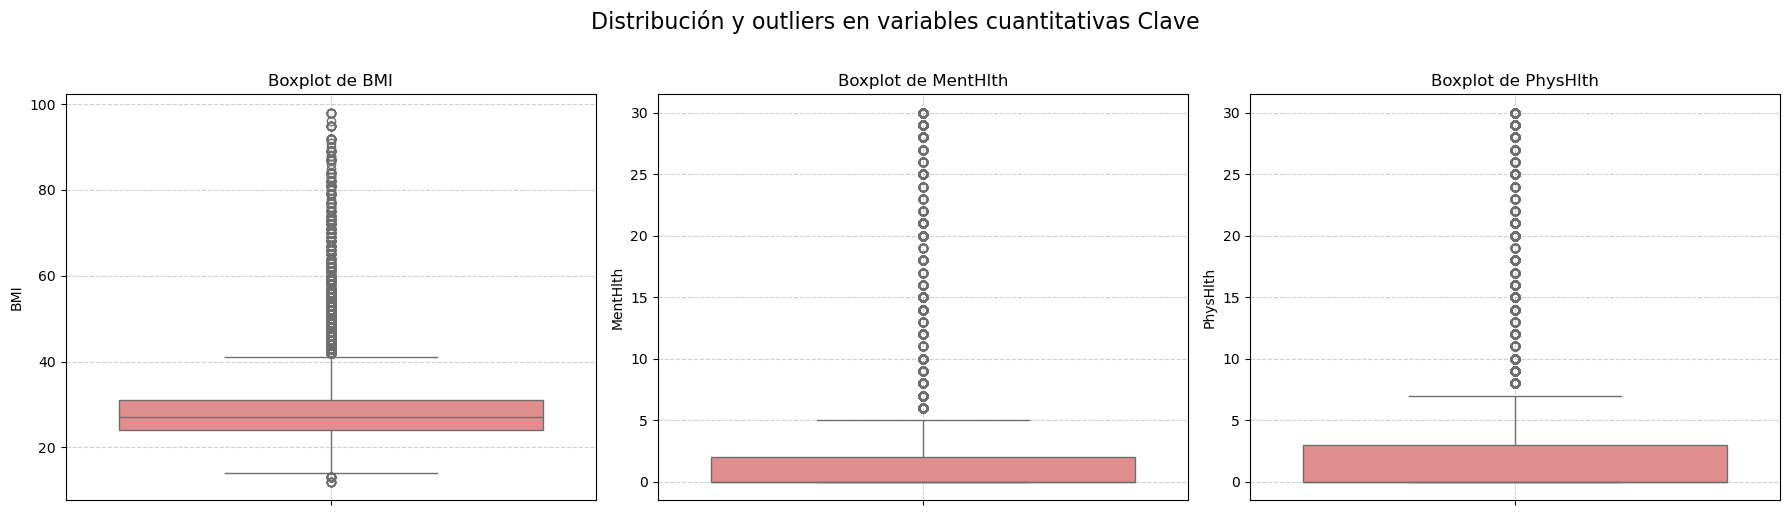

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Buscamos valores extremos mediante gráficos 'boxplot()'
print("Búsqueda de valores extremos (método gráfico): \n")
# Seleccionamos las columnas numéricas para el análisis
features_for_boxplot = ['BMI', 'MentHlth', 'PhysHlth']

plt.figure(figsize=(18, 5))
for i, feature in enumerate(features_for_boxplot):
    plt.subplot(1, len(features_for_boxplot), i +1) # Creamos un subplot para cada variable
#   Color neutro para resaltar outliers sin saturar viz
#   https://python-graph-gallery.com/33-control-colors-of-boxplot-seaborn/
#   https://seaborn.pydata.org/examples/grouped_boxplot.html
    sns.boxplot(y=df[feature], color='lightcoral')
    plt.ylabel(feature, fontsize=10)
    plt.title(f'Boxplot de {feature}')
    plt.grid(True, linestyle='--', alpha=0.6)
    
plt.suptitle('Distribución y outliers en variables cuantitativas Clave', fontsize=16, y=1.02) # Título gral
plt.tight_layout() # espaciado entre gráficos
plt.show()

#### <a id='toc1_1_3_1_'></a>[Análisis crítico de la distribución de las variables cuantitativas clave en el *dataset*](#toc0_)
Los *boxplots* generados para las variables cuantitativas `BMI`, `MentHlth` y `PhysHlth` ofrecen una visión clara y concisa de sus distribuciones y de la presencia de valores atípicos, validando la decisión de analizarlas de esta manera.

1. ***Boxplot* de BMI (Índice de Masa Corporal):**  
   * **Distribución central:** La caja (el rango intercuartílico) muestra que el 50% central de la población tiene un BMI que se sitúa aproximadamente entre 24 y 31, con una mediana (la línea central) alrededor de 27. Parece que el valor más común se encuentra en la categoría de "sobrepeso".  
   * **Valores atípicos (*Outliers*):** El hallazgo más destacado es la gran cantidad de valores atípicos en el extremo superior. Estos puntos superan un BMI de aproximadamente 48. Representan a individuos con obesidad severa. La densidad de estos *outliers* subraya que aunque no son la norma, existe un subgrupo considerable de la población con valores de BMI extremadamente altos, lo cual es un conocido factor de riesgo para la diabetes.  
2. ***Boxplots* de `MentHlth` y `PhysHlth` (Días de mala salud mental y física):**  
   * **Distribución extremadamente asimétrica:** Estos dos gráficos son los más interesantes desde el punto de vista analítico. En ambos casos la mediana es 0 y el 75% de la población (representado por el final de la "caja" o Q3) reporta muy pocos días de mala salud (aproximadamente 2-3 días). Esto nos dice que la gran mayoría de los encuestados se percibe como saludable la mayor parte del tiempo.  
   * **La naturaleza de los *"Outliers"*:** Es vital interpretar correctamente los "outliers" en estos dos gráficos. **No son errores de datos, sino la señal que buscamos.** Representan a la ***minoría de la población que sufre de problemas de salud mental o física de manera crónica o frecuente*** (hasta 30 días al mes). La visualización en *boxplot* es perfecta para aislar a este subgrupo. Estos "puntos atípicos" son en realidad el foco de nuestro estudio: ¿qué características tienen estas personas? ¿Es más probable que tengan diabetes?

***Insights***

Confirmamos visualmente varias hipótesis clave:

> La prevalencia de BMI elevado en la población es significativa.  

> Si bien la mayoría de las personas reporta buena salud mental y física, existe un subgrupo importante que no.  

> El principal desafío analítico no es "limpiar" o "eliminar" los *outliers*, sino **entenderlos**.

> Estos *insights* justifican plenamente las preguntas de investigación de la PR2. 

##### <a id='toc1_1_3_1_1_'></a>[Hipótesis](#toc0_)

La hipótesis es que la "caja", en el análisis en *Tableau* se desplazará hacia arriba y habría aún más *"outliers"*. Esto validaría la conexión entre salud mental y diabetes.

### <a id='toc1_1_4_'></a>[Análisis exploratorio visual preliminar de variables](#toc0_)


Distribución de la variable objetivo (Diabetes_binary):


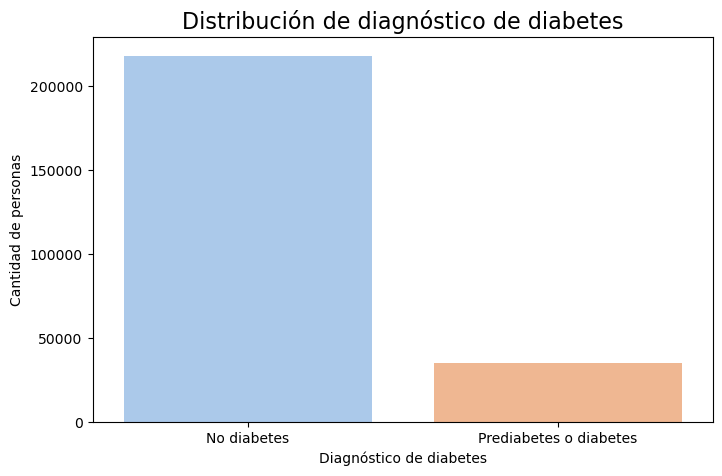


Distribución de salud mental por diagnóstico de diabetes:


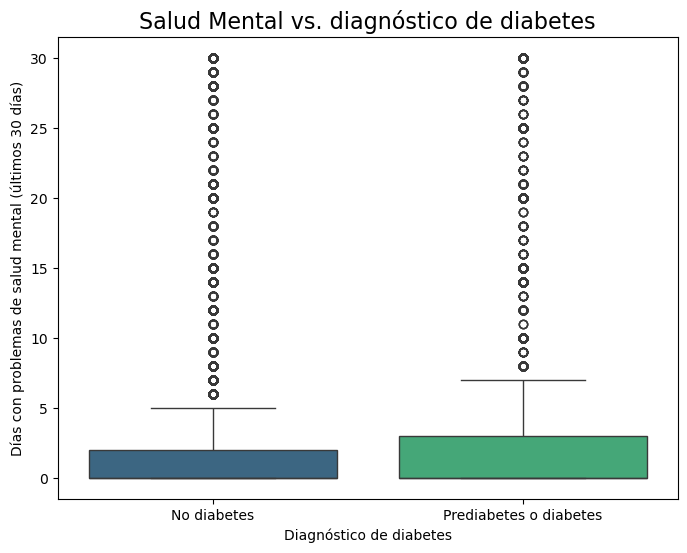


Relación entre diabetes y salud general:


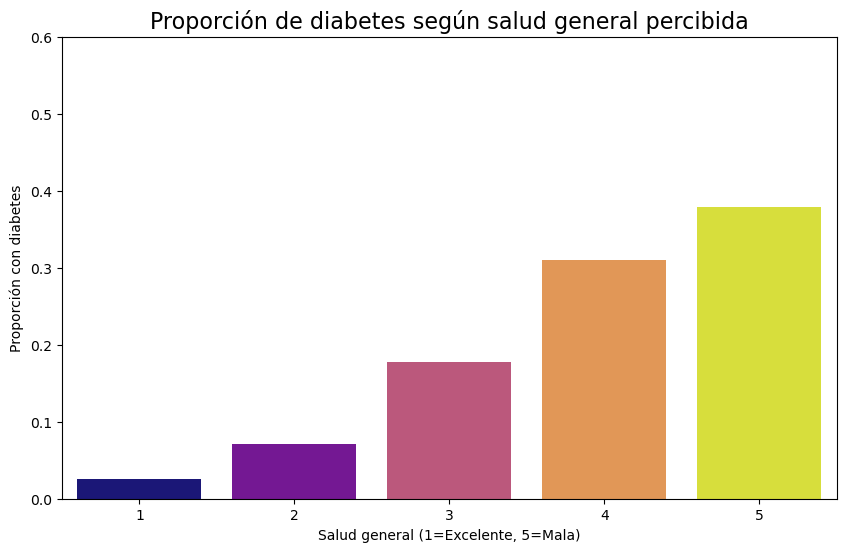


Proporción de personas con problemas de salud física por diagnóstico de diabetes:


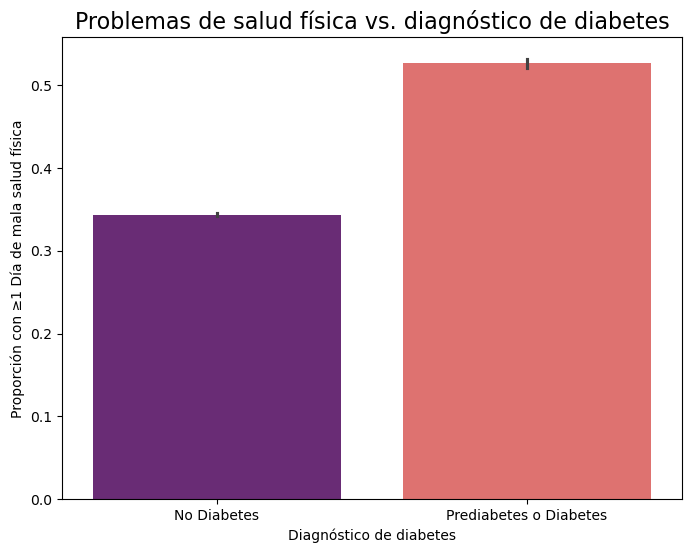


====== Análisis de correlación entre variables: =======


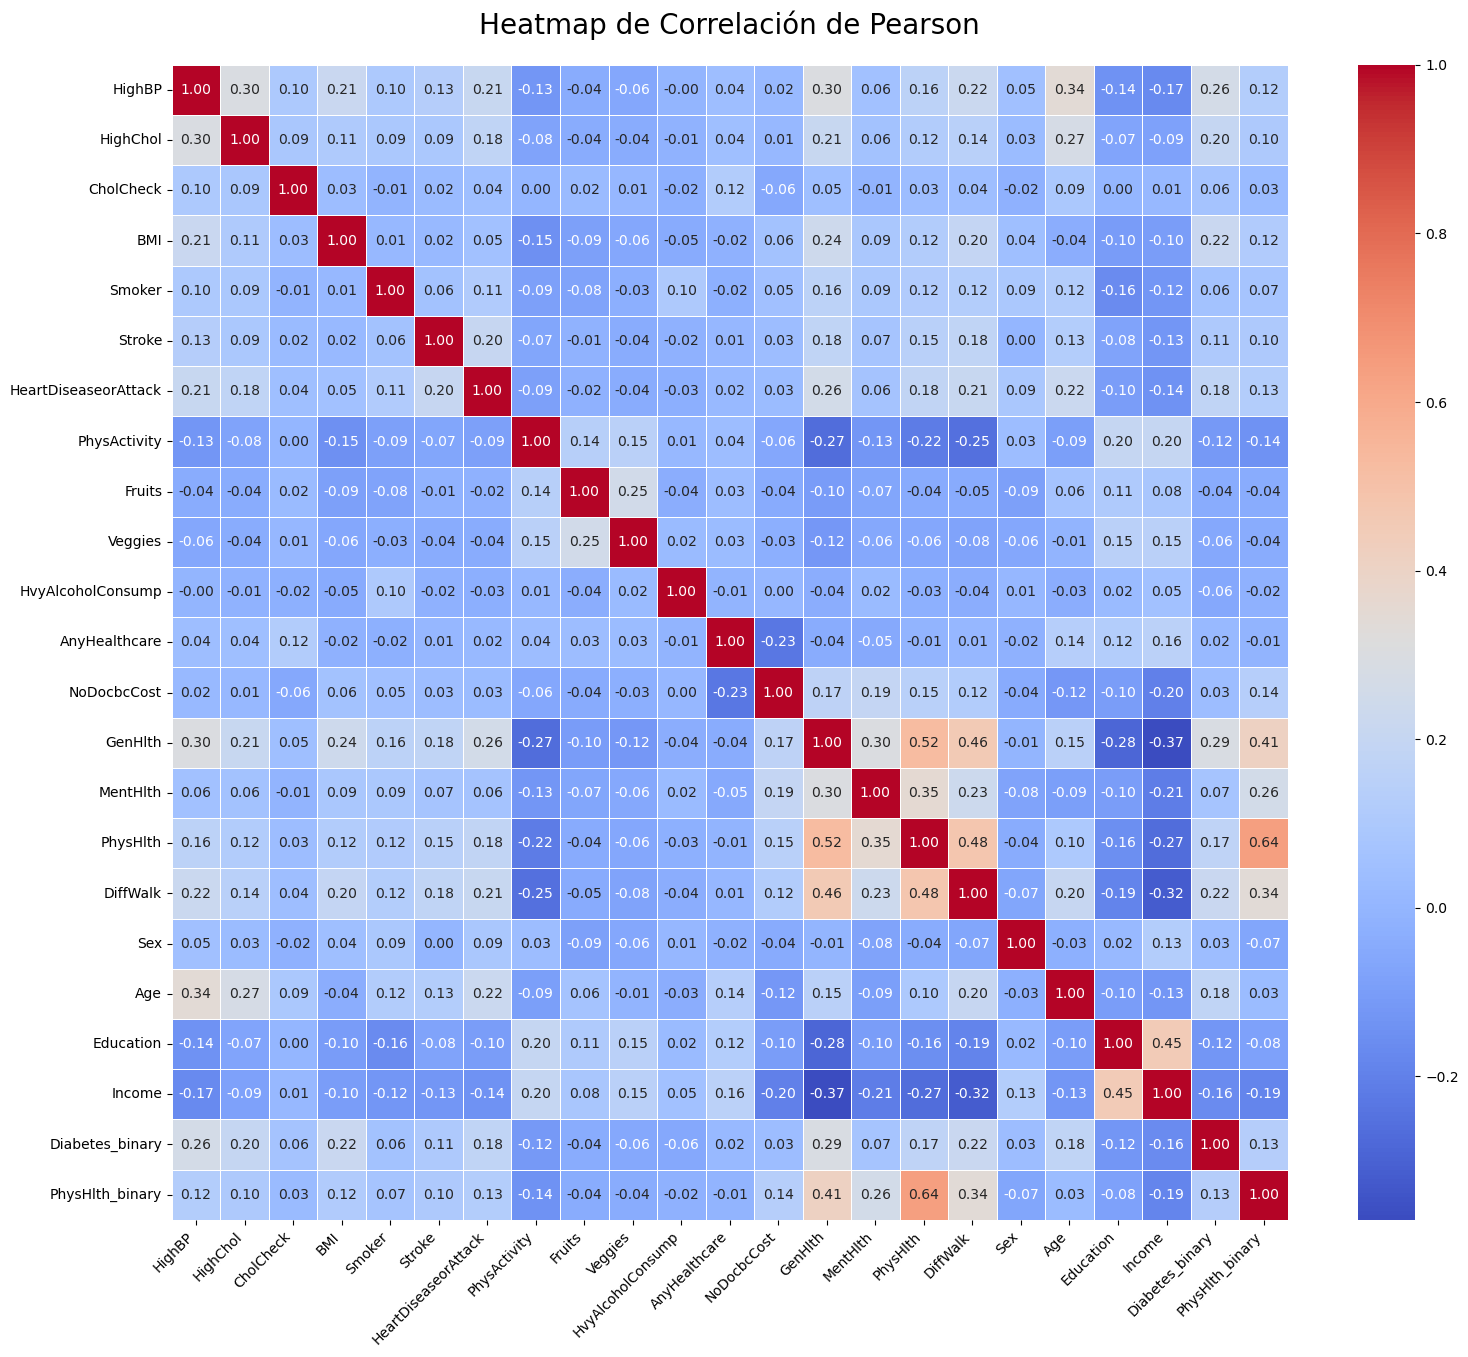


Variables con mayor correlación con 'Diabetes_binary':
Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
PhysHlth_binary         0.131171
Name: Diabetes_binary, dtype: float64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================================================================
# 1. Distribución de la variable objetivo
# ==============================================================================
print("\nDistribución de la variable objetivo (Diabetes_binary):")
plt.figure(figsize=(8, 5))
sns.countplot(x='Diabetes_binary',
              data=df,
              palette='pastel',
              hue='Diabetes_binary',
              legend=False)
plt.title('Distribución de diagnóstico de diabetes', fontsize=16)
plt.xlabel('Diagnóstico de diabetes')
plt.ylabel('Cantidad de personas')
plt.xticks([0, 1], ['No diabetes', 'Prediabetes o diabetes'])
plt.show()

# ==============================================================================
# 2. Relación entre diabetes y salud mental/Física/General
# ==============================================================================

# --- Relación con Salud Mental (MentHlth) ---.
print("\nDistribución de salud mental por diagnóstico de diabetes:")
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diabetes_binary',
            y='MentHlth',
            data=df,
            palette='viridis',
            hue='Diabetes_binary',
            legend=False)
plt.title('Salud Mental vs. diagnóstico de diabetes', fontsize=16)
plt.xlabel('Diagnóstico de diabetes')
plt.ylabel('Días con problemas de salud mental (últimos 30 días)')
plt.xticks([0, 1], ['No diabetes', 'Prediabetes o diabetes'])
plt.show()

# --- Relación con salud general (GenHlth) ---
# Calculamos los datos primero y luego graficamos con Seaborn.
print("\nRelación entre diabetes y salud general:")
prop_diabetes_by_genhlth = df.groupby('GenHlth')['Diabetes_binary'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='GenHlth',
            y='Diabetes_binary',
            data=prop_diabetes_by_genhlth,
            palette='plasma',
            hue='GenHlth',
            legend=False)
plt.title('Proporción de diabetes según salud general percibida', fontsize=16)
plt.xlabel('Salud general (1=Excelente, 5=Mala)')
plt.ylabel('Proporción con diabetes')
plt.ylim(0, 0.6) #  para mejor comparación visual
plt.show()

# --- Relación con cualquier problema de salud física ---
print("\nProporción de personas con problemas de salud física por diagnóstico de diabetes:")
df['PhysHlth_binary'] = df['PhysHlth'] > 0 # Creamos variable binaria

plt.figure(figsize=(8, 6))
sns.barplot(x='Diabetes_binary',
            y='PhysHlth_binary',
            data=df,
            palette='magma',
            hue='Diabetes_binary',
            legend=False)
plt.title('Problemas de salud física vs. diagnóstico de diabetes', fontsize=16)
plt.xlabel('Diagnóstico de diabetes')
plt.ylabel('Proporción con ≥1 Día de mala salud física')
plt.xticks([0, 1], ['No Diabetes', 'Prediabetes o Diabetes'])
plt.show()

# ==============================================================================
# 3. Análisis de correlación general
# ==============================================================================
print("\n====== Análisis de correlación entre variables: =======")
plt.figure(figsize=(18, 15))

# Usamos annot=True para ver números de correlación en el heatmap.
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

plt.title("Heatmap de Correlación de Pearson", y=1.02, size=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

# Vemos las correlaciones más altas con la variable objetivo:
print("\nVariables con mayor correlación con 'Diabetes_binary':")
print(corr_matrix['Diabetes_binary'].sort_values(ascending=False).head(10))

#### <a id='toc1_1_4_1_'></a>[Análisis crítico de la exploración preliminar de variables](#toc0_)

La fase de EDA ha sido fundamental para comprender la estructura interna del dataset y validar las hipótesis iniciales. Los resultados, tanto visuales como numéricos, nos permiten extraer conclusiones fiables y definir los siguientes pasos.

##### <a id='toc1_1_4_1_1_'></a>[Correlación vs. Relación: El Caso de la salud mental](#toc0_)

La lista de las 10 variables con mayor correlación lineal (coeficiente de Pearson) con `Diabetes_binary` es reveladora. Está dominada por indicadores de salud física general y factores de riesgo bien establecidos:

* **GenHlth (Salud general percibida):** Con **0.29**, es el predictor lineal más fuerte. El gráfico de barras confirma esta relación casi monotónica: a peor salud general reportada, la proporción de diabetes aumenta drásticamente.  
* **Factores de riesgo físico:** Le siguen `HighBP` (0.26), `DiffWalk` (0.22), `BMI` (0.22) y `HighChol` (0.20) confirmando el peso de los indicadores cardiovasculares y de movilidad.

Sin embargo, lo más interesante es lo que esta lista **no** muestra de forma prominente: la salud mental. `MentHlth` no aparece en este top 10. ¿Significa que no hay relación? En absoluto. Pueden existir relaciones no lineales y que la distribución tenga otra forma.

El ***boxplot* de `MentHlth` vs. `Diabetes_binary`** nos cuenta la verdadera historia:

* Aunque la mediana de días con mala salud mental es 0 para ambos grupos, la **distribución es claramente diferente**.  
* La "caja" (el rango intercuartílico) del grupo con diabetes es notablemente más alta y ancha. Esto indica que hay una **mayor proporción de personas con algunos días de mala salud mental** y una mayor variabilidad en este grupo.  
* La correlación lineal es baja porque la relación no es una simple línea recta; es una diferencia en la forma de la distribución. La visualización ha devenido sido clave para descubrir este patrón que los números por sí solos ocultaban.

#### <a id='toc1_1_4_2_'></a>[Ausencia de multicolinealidad problemática](#toc0_)

Confirmamos ausencia multicolinealidad es acertada y clave. El *heatmap* de correlación lo confirma: no vemos colores rojo oscuro o azul oscuro entre las variables predictoras ni cifras que cercanas al valor máximo absoluto.

* La correlación más alta entre predictores se da entre **GenHlth y PhysHlth (0.52)** y entre **PhysHlth y DiffWalk (0.48)**. Esto es lógico y esperado: la salud física general, los días específicos de mala salud física y la dificultad para caminar están intrínsecamente ligados.  
* Sin embargo, estos valores no son lo suficientemente altos (generalmente > 0.7) como para indicar redundancia. Cada variable sigue aportando información única.

Esta independencia relativa es una gran ventaja. Significa que al crear nuestros "perfiles de riesgo" cada una de estas variables (salud mental, hábitos, indicadores socioeconómicos, salud física) contribuirá de forma distinta a la definición de los clusters.

#### <a id='toc1_1_4_3_'></a>[Desbalance de clases y enfoque del proyecto](#toc0_)

Una característica fundamental del *dataset* identificada en la exploración inicial, es el notable desbalance en la variable objetivo `Diabetes_binary`. Aproximadamente el 14% de la muestra presenta un diagnóstico positivo de prediabetes o diabetes frente a un 86% que no lo presenta. Si el objetivo del proyecto fuese la construcción de un modelo de clasificación supervisado, este desbalance sería un punto crítico a tratar mediante técnicas como el sobremuestreo (e.g., SMOTE) o un submuestreo para evitar que el modelo se sesgue hacia la clase mayoritaria.

Sin embargo, para el presente proyecto enfocado en un análisis exploratorio y de *clustering* no supervisado, este desbalance no se considera un problema a "corregir". El contexto fundamental es el análisis. Nuestro objetivo no es predecir sino comprender las características que definen a esa minoría del 14%. Por tanto, hemos decidido mantener la distribución original de los datos, puesto que la finalidad de la visualización en *Tableau* será poner de relieve y analizar los patrones que distinguen a este grupo en los diferentes perfiles o clústeres que hemos identificado.

#### <a id='toc1_1_4_4_'></a>[**Insights y próximos pasos**](#toc0_)

El EDA ha sido un éxito. Hemos confirmado que:

> 1. Existen **relaciones claras y visualmente evidentes** entre los indicadores de salud y la diabetes.  
> 2. La relación con la **salud mental es más compleja y sutil** que una simple correlación lineal, justificando plenamente un análisis visual más profundo.  
> 3. El conjunto de datos es robusto y **no presenta problemas de multicolinealidad**ni otros problemas clave que compliquen el análisis.
> 4. Existe un desbalance de clases en la variable objetivo, pero que este no afecta el objetivo de este proyecto.

## <a id='toc1_2_'></a>[Preprocesamiento de datos (*Data Preprocessing*)](#toc0_)

**Con el objetivo de interpretar** los datos (no de modelizar) eliminamos variables binarizadas anteriormente creadas, estandarizamos para aplicar el algoritmo no supervisado *k-means* y creamos el conjunto de datos que emplearemos en *Tableau*

Iniciando ingeniería de características avanzada
Creado 'score_habitos_saludables'.
Creado 'indice_riesgo_cardio'.
--------------------------------------------------
DataFrame final para clustering preparado. Columnas utilizadas:
Index(['CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'PhysHlth_binary', 'score_habitos_saludables', 'indice_riesgo_cardio'],
      dtype='object')
--------------------------------------------------
Características finales escaladas con RobustScaler.
Calculando el número óptimo de clústeres sobre los datos finales...


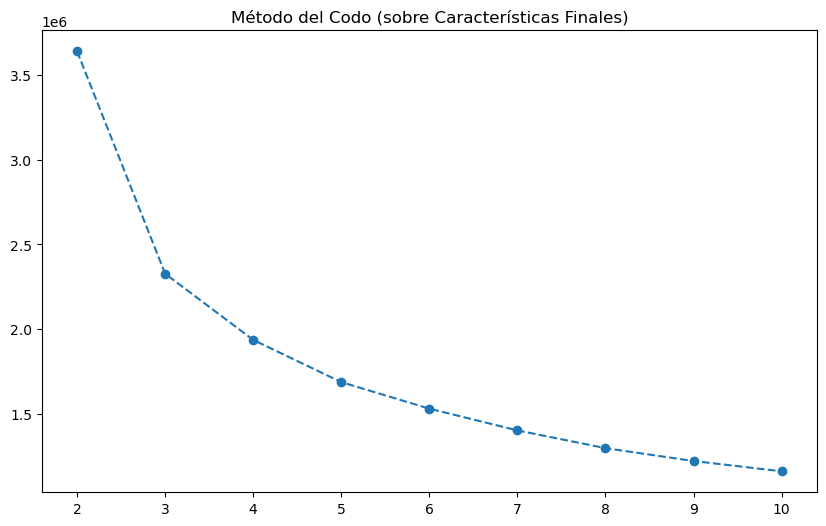


Aplicando K-Means con k=3
Se ha añadido la columna 'cluster' al DataFrame original.
cluster
0    207031
1     23997
2     22652
Name: count, dtype: int64
--------------------------------------------------
DataFrame final con clústeres guardado en: data/cdc_diabetes_health_indicators_clustered.csv
Análisis y clustering completados. ¡Listos para Tableau!


In [6]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings

# Silenciamos warnings futuros
warnings.simplefilter(action='ignore', category=FutureWarning)

# ==============================================================================
# 1. Ingeniería de Características (Creación de Índices)
# ==============================================================================
print("Iniciando ingeniería de características avanzada")

# a) Creamos 'Score' de hábitos saludables
df['score_habitos_saludables'] = df['PhysActivity'] + df['Fruits'] + df['Veggies']
print("Creado 'score_habitos_saludables'.")

# b) Creamos índice de riesgo cardiovascular
# Para esto, primero necesitamos una versión escalada de las variables originales
temp_scaler = RobustScaler()
temp_scaled_features = temp_scaler.fit_transform(df.drop(columns=['Diabetes_binary']))
df_temp_scaled = pd.DataFrame(temp_scaled_features, columns=df.drop(columns=['Diabetes_binary']).columns)

df['indice_riesgo_cardio'] = df_temp_scaled['HighBP'] + df_temp_scaled['HighChol'] + df_temp_scaled['BMI']
print("Creado 'indice_riesgo_cardio'.")
print("-" * 50)


# ==============================================================================
# 2. Preparación del DF final para Clustering
# ==============================================================================

features_to_drop = [
    'Diabetes_binary',
    # Componentes del índice de riesgo cardio
    'HighBP', 'HighChol', 'BMI',
    # Componentes del score de hábitos
    'PhysActivity', 'Fruits', 'Veggies'
]
df_for_clustering = df.drop(columns=features_to_drop)

print("DataFrame final para clustering preparado. Columnas utilizadas:")
print(df_for_clustering.columns)
print("-" * 50)


# ==============================================================================
# 3. Escalado robusto del DF final
# ==============================================================================
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df_for_clustering)

print("Características finales escaladas con RobustScaler.")


# ==============================================================================
# 4. Encontrar k óptimo y aplicar K-Means
# ==============================================================================
print("Calculando el número óptimo de clústeres sobre los datos finales")
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Graficamos los resultados
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Método del Codo (sobre Características Finales)')
plt.show()

# --- Aplicamos K-Means con el k elegido ---
chosen_k = 3 # k óptimo basado en el gráfico del codo
print(f"\nAplicando K-Means con k={chosen_k}")
kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_scaled)

# Añadimos la etiqueta del clúster al DF original
df['cluster'] = cluster_labels
print("Se ha añadido la columna 'cluster' al DataFrame original.")
print(df['cluster'].value_counts().sort_index())
print("-" * 50)

# ==============================================================================
# 5. Guardar el DataFrame Final para Tableau
# ==============================================================================
final_csv_path = 'data/cdc_diabetes_health_indicators_clustered.csv'
df.to_csv(final_csv_path, index=False)
print(f"DataFrame final con clústeres guardado en: {final_csv_path}")

# Fin del script
print("Análisis y clustering completados. ¡Listos para Tableau!")

## <a id='toc1_3_'></a>[**Conclusiones del análisis y preprocesamiento con Python y plan de acción para *Tableau***](#toc0_)

Esta fase del proyecto, desarrollada en un entorno de *Jupyter Notebook* ha sido esencial para transformar el conjunto de datos crudo en un recurso enriquecido y listo para el análisis visual. 
A continuación resumimos el proceso seguido y detallamos el plan de implementación en *Tableau* para responder a nuestras preguntas de investigación.

### <a id='toc1_3_1_'></a>[**Resumen esquemático del procedimiento realizado**](#toc0_)

El flujo de trabajo se ha estructurado en tres grandes fases siguiendo las mejores prácticas en ciencia de datos:

1. **Carga y comprensión inicial de datos:**  
   * Cargamos el dataset "CDC Diabetes Health Indicators" desde el repositorio de la UCI.  
   * Validamos la integridad de los datos, confirmando la ausencia de valores nulos y comprendiendo la estructura inicial (253,680 registros y 22 variables).  
2. **Análisis Exploratorio de Datos (EDA):**  
   * **Análisis Univariado:** Visualizamos las distribuciones de variables clave, destacando el desbalance de la variable objetivo `Diabetes_binary` (14% de casos positivos) y la fuerte asimetría en las variables de salud `MentHlth` y `PhysHlth`.  
   * **Análisis Bivariado:** Exploramos las relaciones entre la diabetes y los predictores. Si bien la correlación lineal de `MentHlth` con diabetes es baja, los *boxplots* revelaron una clara diferencia en la distribución de la salud mental entre los grupos con y sin diabetes. Variables como `GenHlth` y `HighBP` mostraron una fuerte asociación directa.  
   * **Análisis de correlación:** El *heatmap* de la matriz de correlación confirmó la ausencia de multicolinealidad problemática entre las variables predictoras, asegurando que cada una aporta información relativamente independiente.  
3. **Preprocesamiento e ingeniería de características:**  
   * **Escalado Robusto:** Identificamos la necesidad de escalar las variables para el agrupamiento. Seleccionamos *RobustScaler* por su capacidad para mitigar el impacto de los *outliers* detectados en el EDA.  
   * **Ingeniería de características avanzada:** Creamos los indices `score_habitos_saludables` (Componentes ='HighBP', 'HighChol', 'BMI',) e `indice_riesgo_cardio` ( Componentes= 'PhysActivity', 'Fruits', 'Veggies').
   * **Clustering con *K-Means*:** Aplicamos el algoritmo *K-Means* a los datos escalados para segmentar a la población. Mediante el "método del codo" determinamos que **k=3** es el número óptimo de clústeres, ofreciendo el mejor equilibrio entre detalle y interpretabilidad.  
   * **Creación de la variable final:** Generamos la nueva característica *cluster* y se añadió al dataset original **no escalado**. El resultado es un archivo CSV final (`cdc_diabetes_health_indicators_clustered.csv`) que contiene todos los datos originales enriquecidos con la segmentación de perfiles.

## <a id='toc1_4_'></a>[Abordaje estratégico en *Tableau*](#toc0_)

El *dataset* enriquecido nos permite ahora abordar las preguntas de investigación de forma directa y visualmente atractiva en *Tableau*. La variable cluster será el eje central de nuestro futuro *dashboard*.

### <a id='toc1_4_1_'></a>[Pregunta de investigación principal:](#toc0_)
*¿Es posible identificar perfiles de riesgo que combinen factores de salud (especialmente mental), socioeconómicos y de comportamiento, y cómo se asocian estos perfiles con la diabetes?*

**Plan de implementación:**  

1. **Dashboard 1: Caracterización de los perfiles (*Clusters*)**  
   * **Objetivo:** Entender qué define a cada uno de los 3 clústeres a través de los nuevos índices sintéticos.  
   * **Visualizaciones:**  
     * **Gráfico de barras comparativo (Central):** Un gráfico de barras que muestre para cada clúster (eje X) el valor promedio de `indice_riesgo_cardio y score_habitos_saludables` (eje Y, usando dos barras o un eje dual). Esto nos dirá de un solo vistazo si un clúster es de "alto riesgo, malos hábitos", "bajo riesgo, buenos hábitos", etc.  
     * **Tabla de desglose:** Una tabla de resumen que, además de los índices principales, muestre el promedio de otras variables importantes no incluidas en los índices (e.g., `MentHlth`, `GenHlth`, `Age`, `Income`) para cada clúster. Esto añade contexto y profundidad.  
     * Con estas visualizaciones podremos asignar etiquetas intuitivas y basadas en datos a cada clúster (e.g., "Perfil saludable y activo", "Perfil de alto riesgo cardiovascular", "Perfil sedentario con salud precaria").  
2. **Dashboard 2: Análisis de la diabetes por perfil**  
   * **Objetivo:** Contestar la pregunta clave: ¿Cómo varía la prevalencia de diabetes entre estos nuevos perfiles, más ricos y mejor definidos?  
   * **Visualizaciones:**  
     * **Gráfico de barras principal:** Un gráfico de barras que muestre la proporción de `Diabetes_binary` (eje Y) para cada cluster (eje X). Esta seguirá siendo la visualización central, pero ahora los clústeres tendrán mucho más significado.  
     * ***Scatter Plot* de perfiles:** Una visualización clave: un diagrama de dispersión con `indice_riesgo_cardio` en un eje y `score_habitos_saludables` en el otro. Cada punto será un individuo y estarán coloreados según su cluster. Esto mostrará visualmente cómo se separan los perfiles en el espacio de riesgo/hábitos.  
     * ***Boxplots*** **Interactivos:** Replicaremos el *boxplot* de MentHlth vs. Diabetes\_binary, pero añadiendo la capacidad de filtrar por cluster. Esto nos permitirá ver si la relación entre salud mental y diabetes se acentúa en el perfil de "Alto Riesgo Cardiovascular", por ejemplo.  
3. **Interactividad del *Dashboard*:**  
   * Se implementarán **filtros globales** que afecten a todas las visualizaciones. Los filtros clave seguirán siendo demográficos (Age, Sex, Education, Income).  
   * Esto permitirá al usuario explorar preguntas mucho más potentes como: *"Dentro del perfil de 'Alto riesgo cardiovascular', ¿son los individuos de bajos ingresos los que tienen una mayor prevalencia de diabetes?"* o *"¿El 'Perfil saludable y activo' se compone principalmente de gente joven?"*.

Este enfoque nos habilitará contar una historia clara y basada en datos, pasando de una caracterización general de los perfiles a un análisis profundo de cómo estos perfiles se relacionan con el diagnóstico de diabetes, alcanzando así con todos los objetivos de la práctica.